In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.image
import scripts.fsystem
MaskTools = scripts.image.MaskTools()

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"

In [6]:
path_dsdata = "%s/data/WT-1/standard_clean_data_scale_profile_with_pca_map1.dsdata"%(workdir)
path_image = scripts.fsystem.H5manager.reader(path_dsdata,"image_file")[0]
with h5py.File(path_image,"r") as f:
    example = f["image"][()]
    detector_center_px = f["detector_center_px"][()]
print example.shape
print detector_center_px

(2463, 2527)
[1231.348511 1266.124756]


/reg/data/ana03/scratch/zhensu/Develop/psvolume/v3.0/psvolume/scripts/fsystem.py:44: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[keys].value


In [7]:
mask_standard = MaskTools.circleMask( example.shape, \
                                      rmin=40, \
                                      rmax=None, \
                                      center=detector_center_px)

In [23]:
with h5py.File("%s/data/SIM-IMAGE/experiment_sym_aniso_cull_sub_00001.h5"%workdir,"r") as f:
    exp = f["image"][()]
    print exp.shape
with h5py.File("%s/data/SIM-IMAGE/scaled_llm_sub_00001.h5"%workdir,"r") as f:
    sim = f["image"][()]
    print sim.shape

##################################
pattern = exp.copy()
mask_exp = mask_standard * ((pattern>0)*(pattern<1e9)).astype(int)

tmpdata = pattern[mask_exp>0].copy()
mean = np.mean(tmpdata)
std  = np.std(tmpdata)
pattern = (pattern-mean)/std

pattern[mask_exp==0]=-1024
masked_exp = np.ma.masked_where(pattern == -1024, pattern)
cmap = matplotlib.cm.Greys
cmap.set_bad(color='white')

##################################
pattern = sim.copy()
mask_sim = mask_standard * ((pattern>0)*(pattern<1e9)).astype(int)

tmpdata = pattern[mask_sim>0].copy()
mean = np.mean(tmpdata)
std  = np.std(tmpdata)
pattern = (pattern-mean)/std


pattern[mask_sim==0]=-1024 
masked_sim = np.ma.masked_where(pattern == -1024, pattern)
cmap = matplotlib.cm.Greys
cmap.set_bad(color='white')

(2463, 2527)
(2463, 2527)


dpi =  600


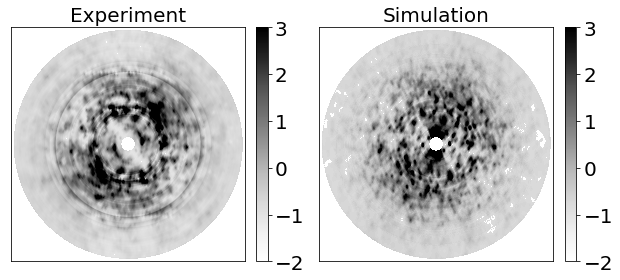

In [24]:
plt.figure(figsize=(9,4))

cx = int(round(detector_center_px[0]))
cy = int(round(detector_center_px[1]))
nxy = 700

plt.subplot(1,2,1)
plt.imshow(masked_exp[cx-nxy:cx+nxy+1,cy-nxy:cy+nxy+1][:,::-1].T,clim=(-2,3),cmap=cmap)
plt.title("Experiment",fontsize=20)
plt.xticks([],[])
plt.yticks([],[])
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

plt.subplot(1,2,2)
plt.imshow(masked_sim[cx-nxy:cx+nxy+1,cy-nxy:cy+nxy+1][:,::-1].T,clim=(-2,3),cmap=cmap)
plt.title("Simulation",fontsize=20)
plt.xticks([],[])
plt.yticks([],[])
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_S09_Simulated_Diffraction_Pattern.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_S09_Simulated_Diffraction_Pattern.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()